import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
The **goal of this notebook** is to find the probabilities of scoring and the maximum score you can expect to get, on average, for any given dice roll.

# Imports 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from fractions import Fraction
from copy import copy
import warnings
warnings.filterwarnings("ignore")
from functions import *

In /Users/gregfeliu/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/gregfeliu/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/gregfeliu/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/gregfeliu/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be re

## Rules to Farkle

![Rules to Farkle](images/farkle_rules.png)

- The rules I play with force the player to get 500 before they can start collecting points. We'll kind of ignore that and leave it to the player to decide on what they should do.
- Also, your points for the round double if you get a 1 on the last die. We'll ignore that one for now...
- I think 3 1's was a thousand for me, but we'll use these rules
- NOTE: you can combine points with any of the combos: e.g.: you roll ('2', '2', '2', '2', '2', '5'). The max score for this role is 2050, not just 2000. 

- [another site with rules](https://www.dicegamedepot.com/farkle-rules/) -- has more variations of the game
- [odds of farking calculator](http://farkle.games/farkle-odds/)
- [dice roller](http://www.playonlinedicegames.com/farkle) for playing online 

## Data Storage

In [2]:
all_rolls_max_score = {"1": 0, "2": 0, "3": 0, "4": 0, "5": 0, "6": 0}
all_rolls_means = {"1": 0, "2": 0, "3": 0, "4": 0, "5": 0, "6": 0}
all_rolls_median = {"1": 0, "2": 0, "3": 0, "4": 0, "5": 0, "6": 0}
odds_of_not_farking = {"1": 0, "2":  0, "3": 0, "4": 0, "5": 0, "6": 0}

# Find expected score for each possible role 

In [3]:
all_combos_for_1_dice_w_scores, avg_score_1_dice = find_mean_score_of_x_dice(1)
all_rolls_means['1'] = avg_score_1_dice
all_rolls_max_score['1'] = find_max_score(all_combos_for_1_dice_w_scores)

In [4]:
all_combos_for_2_dice_w_scores, avg_score_2_dice = find_mean_score_of_x_dice(2)
all_rolls_means['2'] = avg_score_2_dice
all_rolls_max_score['2'] = find_max_score(all_combos_for_2_dice_w_scores)

In [5]:
all_combos_for_3_dice_w_scores, avg_score_3_dice = find_mean_score_of_x_dice(3)
all_rolls_means['3'] = avg_score_3_dice
all_rolls_max_score['3'] = find_max_score(all_combos_for_3_dice_w_scores)

In [6]:
all_combos_for_4_dice_w_scores, avg_score_4_dice = find_mean_score_of_x_dice(4)
all_rolls_means['4'] = avg_score_4_dice
all_rolls_max_score['4'] = find_max_score(all_combos_for_4_dice_w_scores)

In [7]:
all_combos_for_5_dice_w_scores, avg_score_5_dice = find_mean_score_of_x_dice(5)
all_rolls_means['5'] = avg_score_5_dice
all_rolls_max_score['5'] = find_max_score(all_combos_for_5_dice_w_scores)

In [8]:
# not sure that I'm getting the 6 score possiblities...
all_combos_for_6_dice_w_scores, avg_score_6_dice = find_mean_score_of_x_dice(6)
all_rolls_means['6'] = avg_score_6_dice
all_rolls_max_score['6'] = find_max_score(all_combos_for_6_dice_w_scores)

In [9]:
print(f"all_rolls_max_score = {all_rolls_max_score}")
print(f"all_rolls_means = {all_rolls_means}")

all_rolls_max_score = {'1': 100, '2': 200, '3': 600, '4': 1000, '5': 2000, '6': 3000}
all_rolls_means = {'1': 25.0, '2': 50.0, '3': 83.6, '4': 132.7, '5': 202.3, '6': 384.7}


# Find expected score
which is different from average score since expected score is more like the median

In [10]:
med_score_1 = find_median_score(all_combos_for_1_dice_w_scores)
all_rolls_median['1'] = med_score_1
med_score_2 = find_median_score(all_combos_for_2_dice_w_scores)
all_rolls_median['2'] = med_score_2
med_score_3 = find_median_score(all_combos_for_3_dice_w_scores)
all_rolls_median['3'] = med_score_3
med_score_4 = find_median_score(all_combos_for_4_dice_w_scores)
all_rolls_median['4'] = med_score_4
med_score_5 = find_median_score(all_combos_for_5_dice_w_scores)
all_rolls_median['5'] = med_score_5
med_score_6 = find_median_score(all_combos_for_6_dice_w_scores)
all_rolls_median['6'] = med_score_6
all_rolls_median

{'1': 0.0, '2': 50.0, '3': 75.0, '4': 100.0, '5': 150.0, '6': 250.0}

## Combining Median and Mean Scores

In [11]:
med_mean_df = pd.DataFrame(data=[all_rolls_means, all_rolls_median], index=['Mean', 'Median'])
med_mean_df

<IPython.core.display.Javascript object>

,1,2,3,4,5,6
Mean,25.0,50.0,83.6,132.7,202.3,384.7
Median,0.0,50.0,75.0,100.0,150.0,250.0


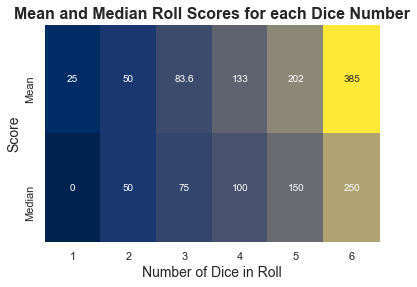

In [12]:
ax3 = sns.heatmap(med_mean_df, annot=True, robust=True, cmap='cividis', cbar=False, fmt='.3g')
plt.xlabel('Number of Dice in Roll', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Mean and Median Roll Scores for each Dice Number', fontsize=16, fontweight='bold')
fig3 = ax3.get_figure()
# fig3.savefig('images/Mean_median_roll_scores.png')

# Apply expected score per role to each possibility 
count how many possiblities have a certain score, then get odds of getting that score

In [13]:
count_of_scores_1 = find_count_of_scores(all_combos_for_1_dice_w_scores)
count_of_scores_2 = find_count_of_scores(all_combos_for_2_dice_w_scores)
count_of_scores_3 = find_count_of_scores(all_combos_for_3_dice_w_scores)
count_of_scores_4 = find_count_of_scores(all_combos_for_4_dice_w_scores)
count_of_scores_5 = find_count_of_scores(all_combos_for_5_dice_w_scores)
count_of_scores_6 = find_count_of_scores(all_combos_for_6_dice_w_scores)

## Show user odds of scoring X score or above

In [14]:
scores_1 = find_odds_for_multiple_scores([50, 100, 250, 500, 1000, 1500], count_of_scores_1)
scores_2 = find_odds_for_multiple_scores([50, 100, 250, 500, 1000, 1500], count_of_scores_2)
scores_3 = find_odds_for_multiple_scores([50, 100, 250, 500, 1000, 1500], count_of_scores_3)
scores_4 = find_odds_for_multiple_scores([50, 100, 250, 500, 1000, 1500], count_of_scores_4)
scores_5 = find_odds_for_multiple_scores([50, 100, 250, 500, 1000, 1500], count_of_scores_5)
scores_6 = find_odds_for_multiple_scores([50, 100, 250, 500, 1000, 1500], count_of_scores_6)

In [15]:
scores_df = pd.DataFrame(data=[scores_1, scores_2, scores_3, scores_4, scores_5, scores_6],
                        columns=['50', '100', '250', '500', '1000', '1500'],
                        index=['1', '2', '3', '4', '5', '6'])
mask = scores_df.eq(0)

<IPython.core.display.Javascript object>

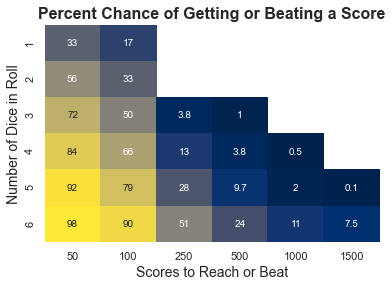

In [16]:
ax = sns.heatmap(scores_df, mask=mask, annot=True, robust=True, cmap='cividis', cbar=False)
plt.xlabel('Scores to Reach or Beat', fontsize=14)
plt.ylabel('Number of Dice in Roll', fontsize=14)
plt.title('Percent Chance of Getting or Beating a Score', fontsize=16, fontweight='bold')
fig = ax.get_figure()
# fig.savefig('images/Chance_of_beating_scores.png')

## Visualizing Expected Score

In [17]:
# will need all scores appearing in a list as many times as they appear
all_roll_values_1 = [all_combos_for_1_dice_w_scores[x][1] for x in range(len(all_combos_for_1_dice_w_scores))]
all_roll_values_2 = [all_combos_for_2_dice_w_scores[x][1] for x in range(len(all_combos_for_2_dice_w_scores))]
all_roll_values_3 = [all_combos_for_3_dice_w_scores[x][1] for x in range(len(all_combos_for_3_dice_w_scores))]
all_roll_values_4 = [all_combos_for_4_dice_w_scores[x][1] for x in range(len(all_combos_for_4_dice_w_scores))]
all_roll_values_5 = [all_combos_for_5_dice_w_scores[x][1] for x in range(len(all_combos_for_5_dice_w_scores))]
all_roll_values_6 = [all_combos_for_6_dice_w_scores[x][1] for x in range(len(all_combos_for_6_dice_w_scores))]

In [18]:
df_score_dist_columns = ['Score', 'Number_of_dice']
df_1 = pd.DataFrame(data=[[x, 1] for x in all_roll_values_1], columns=df_score_dist_columns)
df_2 = pd.DataFrame(data=[[x, 2] for x in all_roll_values_2], columns=df_score_dist_columns)
df_3 = pd.DataFrame(data=[[x, 3] for x in all_roll_values_3], columns=df_score_dist_columns)
df_4 = pd.DataFrame(data=[[x, 4] for x in all_roll_values_4], columns=df_score_dist_columns)
df_5 = pd.DataFrame(data=[[x, 5] for x in all_roll_values_5], columns=df_score_dist_columns)
df_6 = pd.DataFrame(data=[[x, 6] for x in all_roll_values_6], columns=df_score_dist_columns)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
df_all_dice = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6])
df_1_2_3 = pd.concat([df_1, df_2, df_3])
df_4_5_6 = pd.concat([df_4, df_5, df_6])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Score')

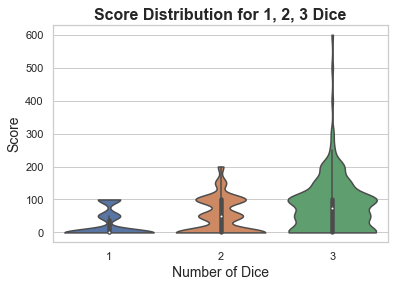

In [20]:
ax1 = sns.violinplot(x='Number_of_dice', y='Score', data=df_1_2_3, cut=0, inner='box', 
               bw=0.25, scale='width')
fig = ax1.get_figure()
ax1.set_title("Score Distribution for 1, 2, 3 Dice", fontsize=16, fontweight='bold')
ax1.set_xlabel("Number of Dice", fontsize=14)
ax1.set_ylabel("Score", fontsize=14)
# fig.savefig('images/Score_distribution_1_2_3.png', bbox_inches='tight')

Text(0, 0.5, 'Score')

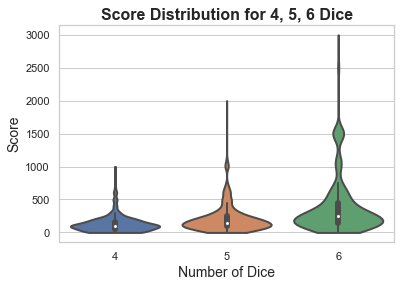

In [21]:
ax2 = sns.violinplot(x='Number_of_dice', y='Score', data=df_4_5_6, cut=0, inner='box', linewidth=2, 
               bw=0.25, scale='width')
fig1 = ax2.get_figure()
ax2.set_title("Score Distribution for 4, 5, 6 Dice", fontsize=16, fontweight='bold')
ax2.set_xlabel("Number of Dice", fontsize=14)
ax2.set_ylabel("Score", fontsize=14)
# fig1.savefig('images/Score_distribution_4_5_6.png', bbox_inches='tight')

# Calculate odds of (not) farking

In [22]:
odds_of_not_farking['1'] = 100 - count_of_scores_1[0][0] #this is odds of getting 0
odds_of_not_farking['2'] = 100 - count_of_scores_2[0][0]
odds_of_not_farking['3'] = 100 - count_of_scores_3[0][0]
odds_of_not_farking['4'] = 100 - count_of_scores_4[0][0]
odds_of_not_farking['5'] = 100 - count_of_scores_5[0][0]
odds_of_not_farking['6'] = 100 - count_of_scores_6[0][0]
odds_of_not_farking

{'1': 33.3, '2': 55.6, '3': 72.2, '4': 84.3, '5': 92.3, '6': 97.7}

## Visualize odds of farking

In [23]:
odds_of_farking_df = pd.DataFrame(data=[count_of_scores_1[0][0], count_of_scores_2[0][0],
                                        count_of_scores_3[0][0], count_of_scores_4[0][0], 
                                         count_of_scores_5[0][0] , count_of_scores_6[0][0]],
                                 index=[x for x in range(1, 7)])

<IPython.core.display.Javascript object>

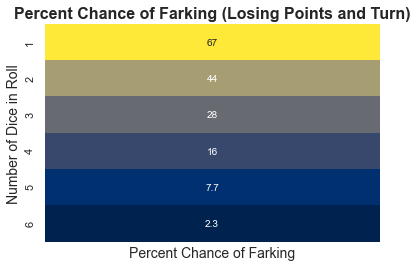

In [24]:
ax4 = sns.heatmap(odds_of_farking_df, annot=True, robust=True, cmap='cividis', cbar=False,
                 xticklabels=False)
plt.xlabel('Percent Chance of Farking', fontsize=14)
plt.ylabel('Number of Dice in Roll', fontsize=14)
plt.title('Percent Chance of Farking (Losing Points and Turn)', fontsize=16, fontweight='bold')
fig4 = ax4.get_figure()
# fig4.savefig('images/Chance_of_Farking.png')